# **IT Risk assessment calculation in a quantum computer example**

# Example 2: probablity, impact

## Step 1: Imports and connection with IBM quantum services

In [1]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from collections import Counter  
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt  

In [2]:
# Initialize  Qiskit Runtime Service
service = QiskitRuntimeService(channel="ibm_quantum")

## Step 2: Data definiton

### Risk matrix for 10 assets (Ax) and 10 threats (Tx)

In [3]:
# Assets:
#   Web Server (A1)
#   Database (A2)
#   File Server (A3)
#   Application Server (A4)
#   Email Server (A5)
#   Backup Server (A6)
#   HR Database (A7)
#   Finance Database (A8)
#   Customer Portal (A9)
#   Internal Network (A10)
#
# [A1,A2,A3,A4,A5,A6,A7,A8,A9,A10]
#
# 
# Asset names
asset_names = [
    "Web\nServer", "Database", "File\nServer", "Application\nServer", 
    "Email\nServer", "Backup\nServer", "HR Database", "Finance\nDatabase", 
    "Customer\nPortal", "Internal\nNetwork"
]
# Threats:
#
# T1: SQL Injection
# T2: DDoS Attack
# T3: Data Exfiltration
# T4: Phishing Attack
# T5: Insider Threat
# T6: Ransomware
# T7: Zero-Day Exploit
# T8: Man-in-the-Middle Attack
# T9: Brute Force Attack
# T10: Malware Injection
#
#
probability_matrix = np.array([
    [0.8, 0.6, 0.0, 0.2, 0.1, 0.3, 0.4, 0.5, 0.2, 0.1],  # T1: SQL Injection
    [0.7, 0.2, 0.1, 0.0, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2],  # T2: DDoS Attack
    [0.1, 0.4, 0.5, 0.3, 0.2, 0.6, 0.1, 0.0, 0.4, 0.3],  # T3: Data Exfiltration
    [0.3, 0.1, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.3, 0.5],  # T4: Phishing Attack
    [0.4, 0.3, 0.2, 0.0, 0.5, 0.1, 0.4, 0.6, 0.2, 0.1],  # T5: Insider Threat
    [0.2, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2, 0.6, 0.4],  # T6: Ransomware
    [0.6, 0.2, 0.4, 0.3, 0.0, 0.3, 0.5, 0.2, 0.1, 0.6],  # T7: Zero-Day Exploit
    [0.5, 0.4, 0.3, 0.6, 0.2, 0.3, 0.2, 0.5, 0.4, 0.2],  # T8: Man-in-the-Middle Attack
    [0.3, 0.6, 0.4, 0.2, 0.5, 0.2, 0.6, 0.1, 0.3, 0.7],  # T9: Brute Force Attack
    [0.4, 0.3, 0.5, 0.4, 0.6, 0.2, 0.3, 0.4, 0.5, 0.6]   # T10: Malware Injection
])

# Impact matrix for 10 assets and 10 threats
impact_matrix = np.array([
    [0.9, 0.8, 0.3, 0.7, 0.5, 0.4, 0.6, 0.9, 0.7, 0.5],  # T1: SQL Injection
    [0.6, 0.5, 0.4, 0.3, 0.7, 0.8, 0.6, 0.5, 0.8, 0.6],  # T2: DDoS Attack
    [0.4, 0.7, 0.8, 0.5, 0.6, 0.7, 0.4, 0.3, 0.8, 0.7],  # T3: Data Exfiltration
    [0.7, 0.3, 0.5, 0.8, 0.4, 0.5, 0.7, 0.2, 0.6, 0.8],  # T4: Phishing Attack
    [0.5, 0.6, 0.4, 0.2, 0.9, 0.3, 0.8, 0.9, 0.6, 0.3],  # T5: Insider Threat
    [0.3, 0.7, 0.5, 0.4, 0.6, 0.9, 0.5, 0.4, 0.8, 0.5],  # T6: Ransomware
    [0.8, 0.4, 0.6, 0.5, 0.3, 0.4, 0.9, 0.3, 0.2, 0.9],  # T7: Zero-Day Exploit
    [0.5, 0.6, 0.5, 0.7, 0.5, 0.4, 0.6, 0.8, 0.7, 0.4],  # T8: Man-in-the-Middle Attack
    [0.6, 0.8, 0.6, 0.4, 0.7, 0.3, 0.7, 0.4, 0.5, 0.9],  # T9: Brute Force Attack
    [0.7, 0.4, 0.8, 0.6, 0.9, 0.5, 0.5, 0.6, 0.8, 0.8]   # T10: Malware Injection
])



## Step 3: Now entering in Quantum Realm...

### Define the number of assets and create the quantum circuit

In [4]:
num_assets = len(asset_names)
qr = QuantumRegister(num_assets, 'q')
cr = ClassicalRegister(num_assets, 'c')
qc = QuantumCircuit(qr, cr)
print("Number of assets =",num_assets)

Number of assets = 10


### Apply Hadamard gates to put the qubits in superposition

In [5]:
for i in range(num_assets):
    qc.h(qr[i])

### Calculate risk matrix

In [6]:
risk_matrix = probability_matrix * impact_matrix

print(risk_matrix)

[[0.72 0.48 0.   0.14 0.05 0.12 0.24 0.45 0.14 0.05]
 [0.42 0.1  0.04 0.   0.21 0.4  0.12 0.2  0.24 0.12]
 [0.04 0.28 0.4  0.15 0.12 0.42 0.04 0.   0.32 0.21]
 [0.21 0.03 0.1  0.4  0.16 0.1  0.21 0.02 0.18 0.4 ]
 [0.2  0.18 0.08 0.   0.45 0.03 0.32 0.54 0.12 0.03]
 [0.06 0.35 0.15 0.04 0.24 0.63 0.15 0.08 0.48 0.2 ]
 [0.48 0.08 0.24 0.15 0.   0.12 0.45 0.06 0.02 0.54]
 [0.25 0.24 0.15 0.42 0.1  0.12 0.12 0.4  0.28 0.08]
 [0.18 0.48 0.24 0.08 0.35 0.06 0.42 0.04 0.15 0.63]
 [0.28 0.12 0.4  0.24 0.54 0.1  0.15 0.24 0.4  0.48]]


### Apply risk-based rotations based on the risk matrix

In [7]:
for i in range(risk_matrix.shape[0]):  # For each threat
    for j in range(num_assets):  # For each asset
        if risk_matrix[i][j] > 0:
            qc.ry(2 * np.arcsin(np.sqrt(risk_matrix[i][j])), qr[j])

### Apply measurement gates to the circuit

In [8]:
# Measure all qubits
qc.measure(qr, cr)

### Draw the quantum circuit

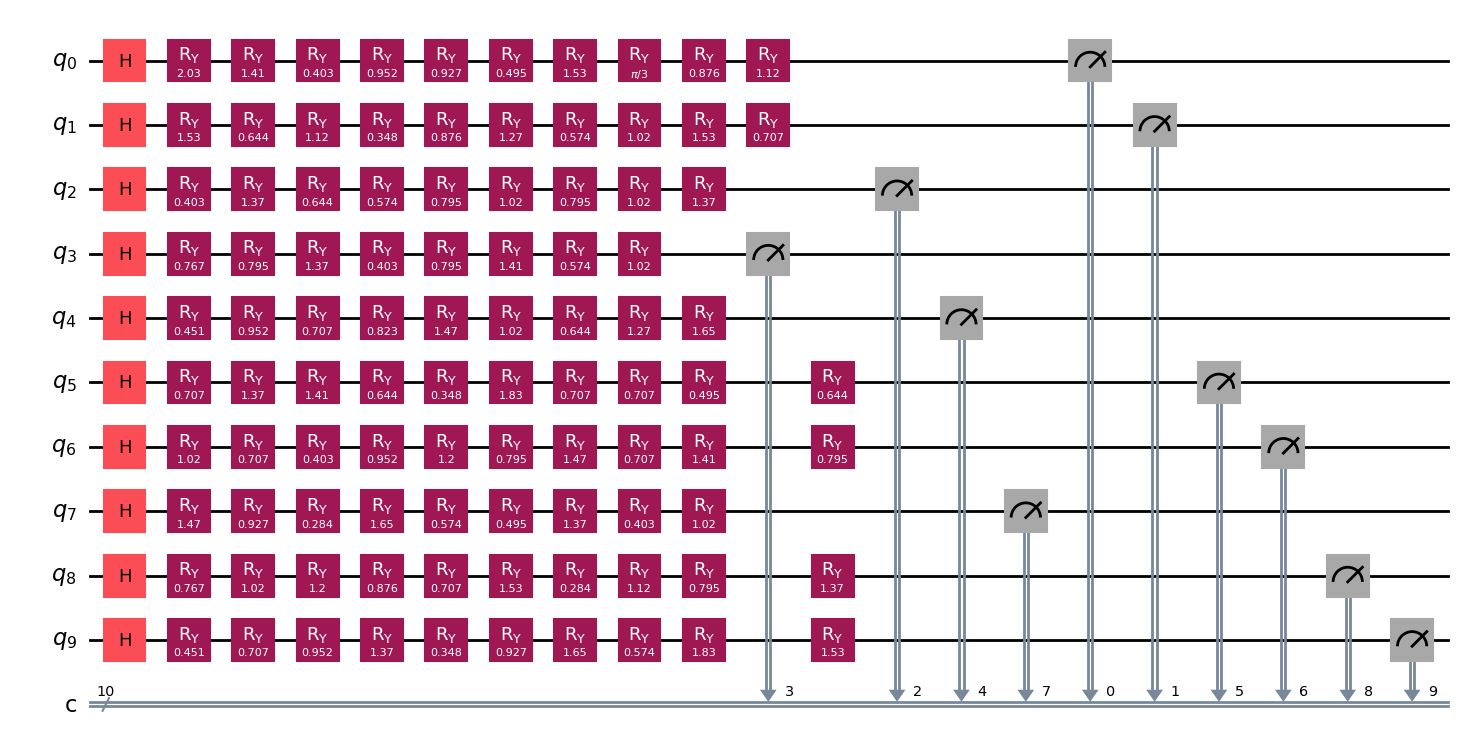

In [9]:
qc.draw(output="mpl")

### Backend selecton

In [10]:
# backend = service.backend(name="ibm_brisbane")
backend = service.backend(name="ibm_kyiv")
# backend = service.backend(name="ibm_sherbrooke")

### Transpile the quantum circuit for the selected backend

In [11]:
transpiled_circuit = transpile(qc, backend=backend)

### Directly run the transpiled circuit on the backend

In [12]:
# If not specifying the number of shots, the default is 1024
shots = 1024

# job = backend.run(transpiled_circuit, shots=shots)
job = backend.run(transpiled_circuit)
job_id = job.job_id()
print(job_id)

result = job.result()

/tmp/ipykernel_3881/1751882231.py:5: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_circuit)


cwvtsmp60bqg008pp8b0


# MAYDAY!!! MAYDAY!!!

In [ ]:
#job.cancel()

### Get the result counts

In [13]:
counts = result.get_counts()
print("Simulation Result:", counts)
print("Length of counts",len(counts))

Simulation Result: {'0011011100': 109, '1010001100': 6, '1111011110': 4, '0011111100': 280, '1010100110': 1, '1110110000': 1, '0101001110': 1, '1001101100': 1, '1001111100': 1, '0010011111': 2, '0101101100': 1, '1011111110': 19, '0111001110': 12, '0101111110': 5, '0000111100': 9, '0000111110': 7, '0010100110': 19, '0101011110': 3, '0101111100': 5, '0011010000': 2, '0010101010': 1, '1110011100': 11, '0001000110': 1, '1101101100': 1, '0001101100': 5, '0000011100': 1, '0010111010': 1, '0110011110': 38, '0111001100': 25, '1011110100': 3, '0010111101': 2, '0110101101': 2, '0111110101': 1, '0010010111': 1, '0010101110': 86, '0110100110': 9, '0100011100': 1, '0101110110': 1, '1000111100': 1, '0010011100': 99, '0111011100': 43, '0000101100': 9, '0011110000': 1, '0101110100': 3, '1110101110': 5, '1110000110': 1, '0111001101': 1, '0010101111': 1, '1011000110': 1, '0010001110': 24, '1110011110': 8, '0100110100': 1, '0011110010': 1, '1110111101': 1, '0110111010': 2, '0110001110': 20, '0111011110':

### Calculate risks per asset

In [14]:
asset_risks = [0] * len(next(iter(counts)))

for bitstring, frequency in counts.items():
    for i, bit in enumerate(bitstring):
        if bit == '1':
            asset_risks[i] += frequency / shots

# Truncate to 2 decimals 
asset_risks_truncated = [round(x, 2) for x in asset_risks]

# Print the cumulative risk vector
print("Cumulative Risk per Asset:", asset_risks_truncated)

# Cumulative Risk per Asset: [1.12, 1.68, 2.07, 1.97, 2.89, 1.67, 2.62, 2.26, 1.98, 1.73]
# Cumulative Risk per Asset: [1.23, 1.91, 0.92, 1.89, 2.14, 2.83, 2.11, 2.32, 1.51, 1.98]


Cumulative Risk per Asset: [0.41, 1.42, 3.78, 1.91, 2.9, 2.73, 3.37, 3.87, 1.61, 0.04]


### Plot the bar chart

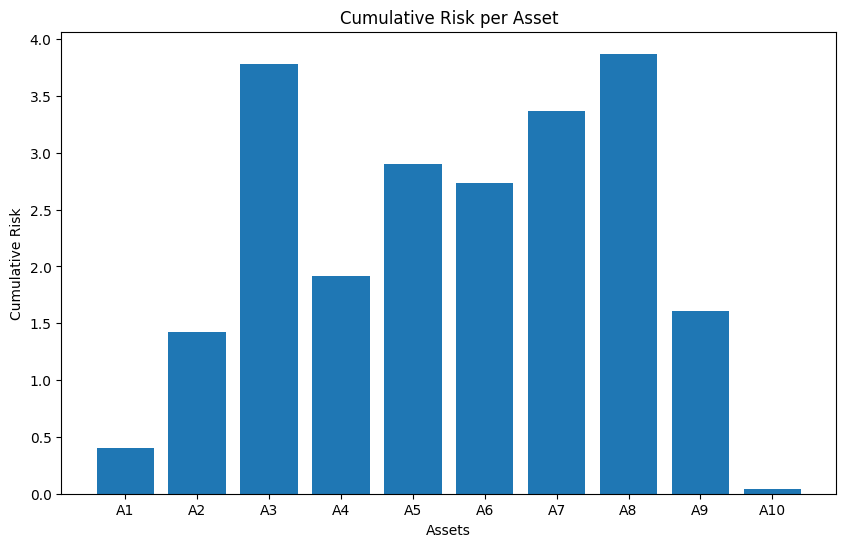

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(asset_risks)), asset_risks, tick_label=[f'A{i+1}' for i in range(len(asset_risks))])
plt.title("Cumulative Risk per Asset")
plt.xlabel("Assets")
plt.ylabel("Cumulative Risk")
plt.show()
